# Are Social Media Junkies Really More Social? 

Personality tests can tell us whether people are more likely to do any number of things. People who identify as "thinkers" rather than feelers might be more likely to make pro-con lists for difficult decisions. "Perceivers" might be more likely than "judgers" to go on a spontaneous trip, or try new things. But is it fair to say that certain personality types reliably act in a certain way?  

In this analysis, I investigate whether extroverts more active on social media. 

In the Meyers' Brigs (personality) Type Indicator (MBTI), Introversion (I) and Extroversion (E) define how people direct their energy and interact with the world. I expect that people who are more extroverted will be more likely to interact with others, even online! However the opposite may be true, that introverts prefer online interactions to in person interactions, and are therefore more likely to replace in-person conversations with social media ones. 

Understanding the likelihood that different personality types post on social media might tell us which of these hypotheses drive behavior for different kinds of people. 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
    #had to look this up

In [4]:
sm = pd.read_csv('data/mbti.csv')

First, I discovered how many people posting on social media are extroverts. After all, there's a possibility that just by nature of being more social, they're more likely to be incldued in the dataset. To identify this, I counted the number of people who identify as extroverted ("E" in the dataset) compared to the number of people who identify as introverted ("I" in the dataset). 

In [5]:
#split the type column into each of the identifiers
sm['M'] = sm['type'].str[0]
sm['B'] = sm['type'].str[1]
sm['T'] = sm['type'].str[2]
sm['I'] = sm['type'].str[3]

#basic summary statistics for the numbers of each personality trait
sm['M'].value_counts()

M
I    6676
E    1999
Name: count, dtype: int64

In [6]:
introvert = sm['M'].value_counts().iloc[0]
extrovert = sm['M'].value_counts().iloc[1]

In [7]:
mkdwm_str = f'''
Surprisingly, the number of introverts in the dataset **({introvert})** is far larger than the number of extroverts **({extrovert})**. 

To see whether this kind of variation in personality traits was spread consistently across the dataset, or whether my sample might be skewed toward a certain personality, I plotted the frequency of different MBTI identifiers.
'''
display(Markdown(mkdwm_str))


Surprisingly, the number of introverts in the dataset **(6676)** is far larger than the number of extroverts **(1999)**. 

To see whether this kind of variation in personality traits was spread consistently across the dataset, or whether my sample might be skewed toward a certain personality, I plotted the frequency of different MBTI identifiers.


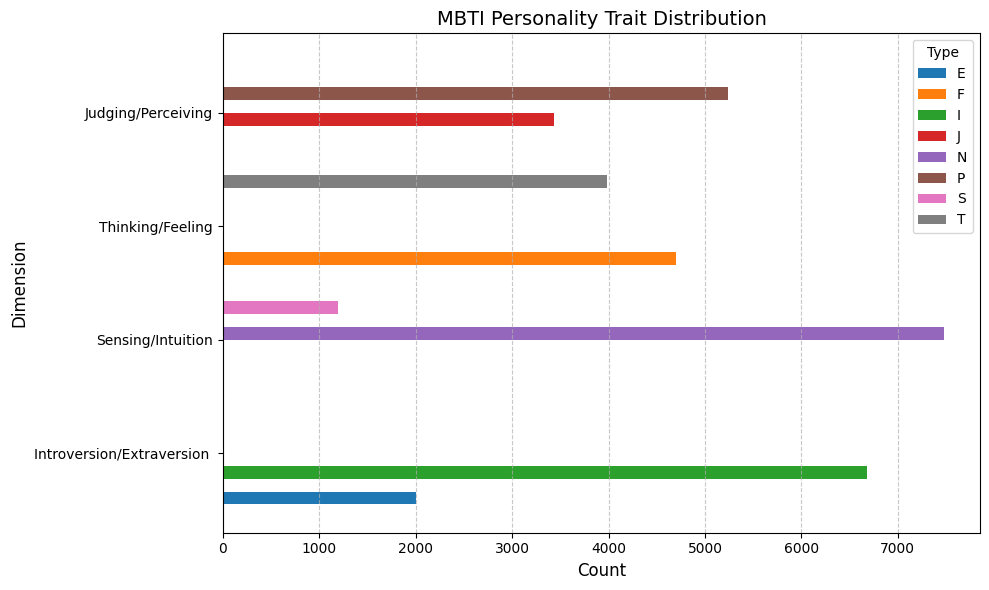

In [8]:
#making a dataframe so I can plot the whole set of personality traits in the dataset
    #I didn't realize until later that MBTI just stands for meyers briggs personality types, 
    #but these were still useful identifiers for the labels, which I made in this dictionary
counts = pd.DataFrame({
    'Introversion/Extraversion ': sm['M'].value_counts(),
    'Sensing/Intuition': sm['B'].value_counts(),
    'Thinking/Feeling': sm['T'].value_counts(),
    'Judging/Perceiving': sm['I'].value_counts()
})

#had to look up how to do this, because the pandas plot from the 03 slides for this week wasn't super customizable
    #how I understand this is that fig changes the canvas size and ax manages the plot itself
    #it's the same as saying: 
        # result = plt.subplots()
        # fig = result[0]  # the figure
        # ax = result[1]   # the axes
    #which assigns a figure and axis so I can manage these separately
fig, ax = plt.subplots(figsize=(10, 6))
counts.transpose().plot(kind='barh', ax=ax, width=.9) 
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Dimension', fontsize=12)
ax.set_title('MBTI Personality Trait Distribution', fontsize=14)
ax.legend(title='Type')
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() #had to look this up, but I still don't understand why my spacing is so strange
plt.show()

It appears that much like the introversion/extroversion element of the Meyers Briggs personality type, there is a wide gap between respondents who identify as Intuitive vs. Sensing personality types. There are more similar distributions between the Judging/Perceivng and the Thinking/Feeling categories. 

Therefore, if we assume that our sample is representative of the entire population, the high number of introverts in out data might support the second hypotheses. Because introverts are less predisposed to social interactions, they are more likely to engage online. This may be a replacement of otherwise in-person conversations. 

## Is there a difference in _how_ introverts and extroverts engage online? 

Although more introverts in the sample supports the second hypothesis, this may also be a quirk of data collection. Perhaps the specific online forum of MBTI personalities is more likely to include introverts for some other systematic reason, unrelated to personality type. 

To further test my hypotheses, I checked the length of posts for different personality types. 

In [12]:
sm['post_length'] = sm['posts'].str.len() #take the length
sm[1:3]

,filename,type,posts,M,B,T,I,post_length
1,1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,7053
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,5265
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,6271
4,4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,6111


In [18]:
#take the mean of the I and E groups in the M column to see the average post length
len_by_ei = sm.groupby('M')['post_length'].mean()
len_by_ei

M
E    7198.235118
I    7245.995057
Name: post_length, dtype: float64

In [22]:
len_by_ei['E'] > len_by_ei['I'] #unclear why I couldn't use 1 and 0 here. Different data types? 

np.False_

In [23]:
(len_by_ei['E'] - len_by_ei['I']).round()

np.float64(-48.0)

Consistent with my earlier findings, it seems like introverts are more active on social media than extroverts. On average, extroverts will use 48 less characters in a post than introverts. 
